In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [44]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# Extract features (X) and targets (y)
X = phiusiil_phishing_url_website.data.features  # Features as Pandas DataFrame
y = phiusiil_phishing_url_website.data.targets   # Targets as Pandas DataFrame or Series

# Combine features and target into a single DataFrame for analysis
dataset = pd.concat([X, y], axis=1)

In [45]:
print("Dataset Shape:", dataset.shape)
print()
print(dataset.head())

Dataset Shape: (235795, 55)

                                  URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com         31    www.southbankmosaics.com   
1            https://www.uni-mainz.de         23            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk         29      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com         26         www.sfnmjournal.com   
4  https://www.rewildingargentina.org         33  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0            24           0  com               100.0              1.000000   
1            16           0   de               100.0              0.666667   
2            22           0   uk               100.0              0.866667   
3            19           0  com               100.0              1.000000   
4            26           0  org               100.0              1.000000   

   TLDLegitimateProb 

In [46]:
# Check for missing values
print("Missing Values Per Column:\n", dataset.isnull().sum())

Missing Values Per Column:
 URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatc

In [47]:
print(dataset.columns)

print()

print("Number of columns : ",len(dataset.columns))

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [49]:
# Now drop unnecessary columns :

columns_to_drop = [
    'URLSimilarityIndex', 'TLDLegitimateProb', 'LineOfCode', 'LargestLineLength',
    'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
    'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
    'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 
    'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 
    'NoOfExternalRef', 'NoOfDegitsInURL', 'URLCharProb', 'DegitRatioInURL', 
    'Domain', 'DomainLength', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL','IsDomainIP'
]

dataset.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# URLLength, CharContinuationRate, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, 
# NoOfLettersInURL, LetterRatioInURL, NoOfOtherSpecialCharsInURL, SpacialCharRatioInURL, IsHTTPS, TLD.

In [50]:
print(dataset.columns)
print(len(dataset.columns))

Index(['URL', 'URLLength', 'TLD', 'CharContinuationRate', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'label'],
      dtype='object')
15


Text(0.5, 1.0, 'Count of Labels')

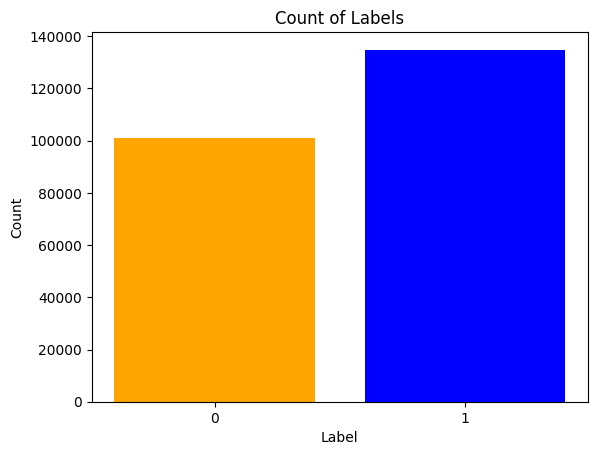

In [51]:
import matplotlib.pyplot as plt
counts = dataset['label'].value_counts()
plt.bar(counts.index, counts.values, color=['blue', 'orange'])

plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels')

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import string

def extract_url_features_from_input(url):
    """
    Extract features from a single URL input.
    
    Parameters:
    url (str): A single URL to extract features from.
    
    Returns:
    dict: A dictionary containing the extracted features.
    """
    features = {}

    # Feature: URL Length
    features['URLLength'] = len(url)

    # Feature: Number of Subdomains
    domain = url.split("://")[-1].split("/")[0]
    features['NoOfSubDomain'] = domain.count('.') - 1 if '.' in domain else 0

    # Feature: Obfuscation
    special_chars = ["@", "-", "_", "/", "=", "?"]
    features['HasObfuscation'] = 1 if any(char in url for char in special_chars) else 0
    features['NoOfObfuscatedChar'] = sum(char in special_chars for char in url)
    features['ObfuscationRatio'] = features['NoOfObfuscatedChar'] / features['URLLength']

    # Feature: Character Continuation Rate
    features['CharContinuationRate'] = sum(url[i] == url[i - 1] for i in range(1, len(url))) / len(url) if len(url) > 1 else 0

    # Feature: Letter Ratios and Counts
    features['NoOfLettersInURL'] = sum(char.isalpha() for char in url)
    features['LetterRatioInURL'] = features['NoOfLettersInURL'] / features['URLLength']

    # Feature: Special Characters Ratio
    special_counts = ['=', '?', '&', '@', '-']
    features['SpacialCharRatioInURL'] = sum(url.count(char) for char in special_counts) / features['URLLength']

    # Feature: Number of Other Special Characters in URL
    all_special_chars = set(string.punctuation)  # All special characters
    known_special_chars = set(special_chars)    # Already counted special characters
    other_special_chars = all_special_chars - known_special_chars  # Remaining characters
    features['NoOfOtherSpecialCharsInURL'] = sum(char in other_special_chars for char in url)

    # Feature: Is HTTPS
    features['IsHTTPS'] = 1 if url.startswith('https://') else 0

    # Feature: TLD (Last part of domain after '.')
    tld = domain.split('.')[-1]
    features['TLD'] = tld

    return features


def preprocess_for_training_with_scaling(dataset):
    """
    Preprocess the dataset for training by extracting features, encoding, and scaling.
    
    Parameters:
    dataset (pd.DataFrame): Original dataset containing at least the 'URL' column.
    
    Returns:
    pd.DataFrame: Processed and scaled dataset ready for model training.
    """
    # Extract features for each URL in the dataset
    url_features_list = dataset['URL'].apply(extract_url_features_from_input)

    # Convert the list of features into a DataFrame
    features_df = pd.DataFrame(url_features_list.tolist())

    # Frequency encoding for TLD
    tld_counts = features_df['TLD'].value_counts()
    features_df['TLD_encoded'] = features_df['TLD'].map(tld_counts)

    # Drop the original TLD column as it is now encoded
    features_df.drop(['TLD'], axis=1, inplace=True)

    # Concatenate the processed features with the original labels (assuming 'label' column exists)
    dataset_processed = pd.concat([features_df, dataset['label']], axis=1)

    # Separate features and labels for scaling
    features = dataset_processed.drop('label', axis=1)
    labels = dataset_processed['label']

    # Initialize scaler and scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Combine scaled features with labels
    scaled_dataset = pd.DataFrame(scaled_features, columns=features.columns)
    scaled_dataset['label'] = labels.reset_index(drop=True)

    return scaled_dataset, scaler


def preprocess_single_url(url, scaler, tld_counts):
    """
    Preprocess a single URL for prediction using the trained model.
    
    Parameters:
    url (str): The URL to preprocess.
    scaler (StandardScaler): The scaler used during training.
    tld_counts (pd.Series): Frequency counts of TLDs used during training.
    
    Returns:
    pd.DataFrame: Preprocessed and scaled feature set for the URL.
    """
    # Extract features from the URL
    features = extract_url_features_from_input(url)

    # Encode TLD using frequency counts
    features['TLD_encoded'] = tld_counts.get(features['TLD'], 0)

    # Drop original TLD key as it is now encoded
    features.pop('TLD', None)

    # Convert features to a DataFrame
    features_df = pd.DataFrame([features])

    # Scale features using the provided scaler
    scaled_features = scaler.transform(features_df)

    return scaled_features


In [54]:
scaled_dataset.head()

,URLLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,CharContinuationRate,NoOfLettersInURL,LetterRatioInURL,SpacialCharRatioInURL,NoOfOtherSpecialCharsInURL,IsHTTPS,TLD_encoded,label
0,-0.081694,-0.272125,0.0,-0.280493,-0.947990,-0.315360,-0.007175,0.891918,-0.461711,-0.176923,0.530259,1.040403,1
1,-0.275801,-0.272125,0.0,0.023861,1.647217,0.511623,-0.321046,-0.368121,1.810663,-0.176923,0.530259,-0.977234,1
2,-0.130221,1.393996,0.0,-0.280493,-0.774977,-0.149963,-0.111799,0.303900,-0.461711,0.323834,0.530259,-0.932578,1
3,-0.203011,-0.272125,0.0,-0.280493,-0.467396,0.144075,-0.181548,0.503017,-0.461711,-0.176923,0.530259,1.040403,1
4,-0.033167,-0.272125,0.0,-0.280493,-1.100650,-0.461298,0.062574,1.015451,-0.461711,-0.176923,0.530259,-0.702678,1


In [53]:
# Preprocess the dataset using the defined preprocessing function
scaled_dataset, scaler = preprocess_for_training_with_scaling(dataset)

# Save the processed dataset to a CSV file
output_file = "processed_dataset_new.csv"
scaled_dataset.to_csv(output_file, index=False)

# Generate a download link for the CSV file
from IPython.display import FileLink
FileLink(output_file)

/kaggle/working/processed_dataset_new.csv